In [1]:
import pandas as pd

df = pd.read_csv( 'vanGogh.csv' )

print( 'Number of rows and columns: ' + str(df.shape) + '\n\n')

print( 'Column names: ')
for c in df.columns:
    print(c)


Number of rows and columns: (714, 17)


Column names: 
title
tokens
ttr
sentences
syllables
nouns
adjectives
adverbs
fk
death
fatigue
depression
indifference
from
to
date
year


The cell below creates a colours list which can later be used in visualisations. It also adds a column/Series to the dataframe to indicate the phase.

In [7]:
colours = []

## 1883: Move to Antwerp and Paris
## 1888: Move to Arles

legendDict = dict()

for y in df['year']:
    if y < 1883:
        colours.append('#1560d8')
        legendDict['phase1'] = '#1560d8'
    elif y < 1888:
        colours.append('#e0cb0f')
        legendDict['phase2'] = '#e0cb0f'
    else:
        colours.append('#d10833')
        legendDict['phase3'] = '#d10833'
        

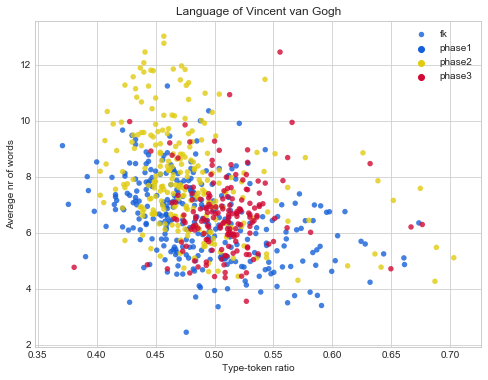

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

    
plt.style.use('seaborn-whitegrid')

fig = plt.figure( figsize=( 8 , 6 )  )
ax = plt.axes()

ax.scatter( df['ttr'] , df['fk']  , alpha=0.8, edgecolors='none', s=30,  c = colours )
ax.set_xlabel('Type-token ratio')
ax.set_ylabel('Average nr of words')

ax.set_title( 'Language of Vincent van Gogh')


for l in legendDict:
    ax.scatter( [] , []  , label = l ,  c = legendDict[l] )

ax.legend()
plt.show()

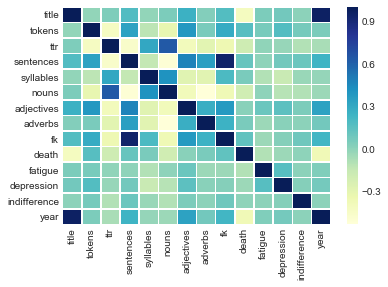

In [9]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap( df.corr() , linewidth=0.5 , cmap="YlGnBu" )
plt.show()

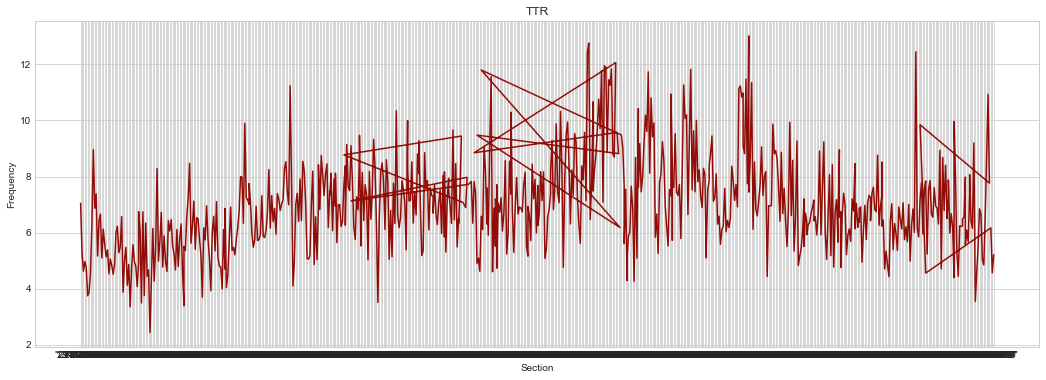

In [26]:
fig = plt.figure(  figsize=( 18 , 6 ) )
ax = plt.axes()

ax.plot( df['date'].astype(str) , df['fk'] , color = '#930d08' , linestyle = 'solid')

ax.set_xlabel('Section')
ax.set_ylabel('Frequency')
ax.set_title( 'TTR')

plt.show()

# Histograms

See also: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

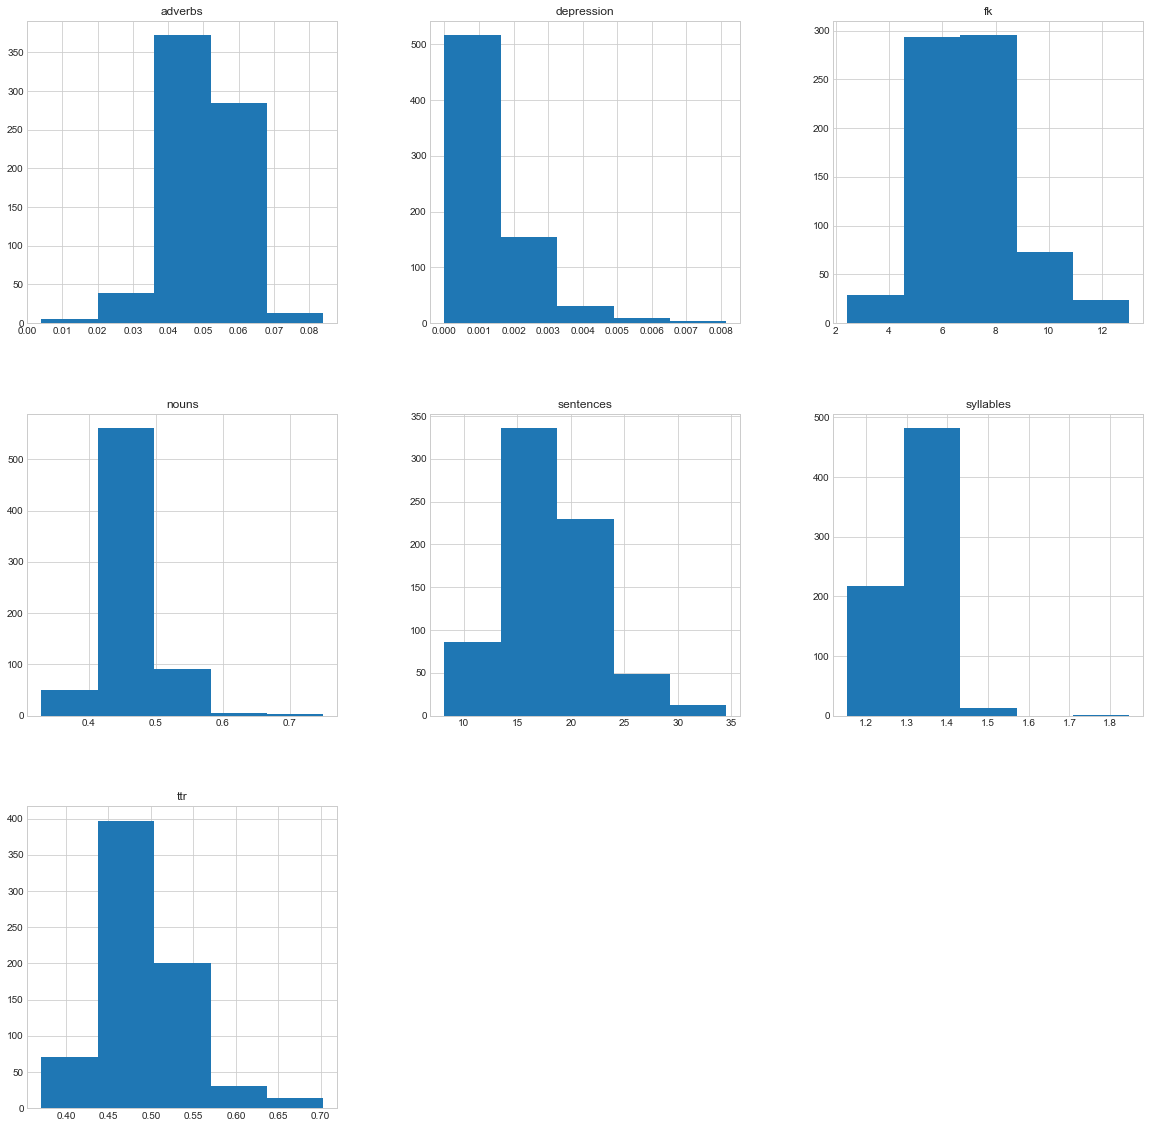

In [34]:
hist = df.hist(bins=5 , figsize = (20,20) , column = ['ttr', 'fk' , 'sentences' , 'syllables' , 'depression' , 'nouns' , 'adverbs' ])